In [59]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision
import torch.optim as optim

In [60]:
img = torchvision.io.read_image("images t4/cyber-kitty.jpg")
img = torch.tensor(img, dtype=torch.float)
print(img.shape)

torch.Size([3, 525, 800])


C:\Users\Arjun\AppData\Local\Temp\ipykernel_18108\1013074233.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, dtype=torch.float)


In [61]:
crop = torchvision.transforms.functional.crop(img, 50, 230, 300, 300)

In [62]:
def mask_image(img, prop):
    img_copy = img.clone()
    mask = torch.rand(img.shape[1:]) < prop
    mask_rgb = mask.unsqueeze(0).repeat(img.shape[0], 1, 1)
    img_copy[mask_rgb] = float('nan')
    
    return img_copy, mask_rgb

In [63]:
masked_img = mask_image(crop, 0.3)

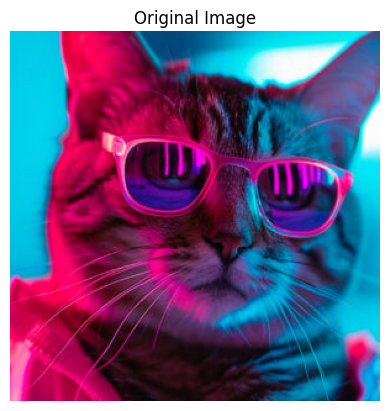

C:\Users\Arjun\AppData\Local\Temp\ipykernel_18108\615925388.py:3: RuntimeWarning: invalid value encountered in cast
  plt.imshow(image_np.astype(np.uint8))


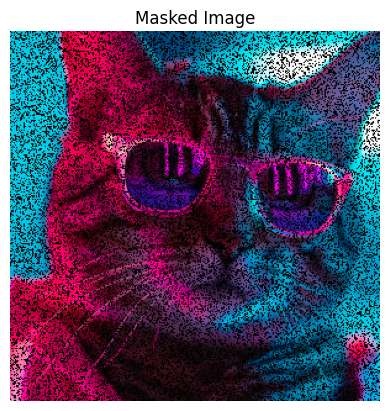

In [64]:
def show_image(image_tensor, title):
    image_np = image_tensor.permute(1, 2, 0).cpu().numpy()
    plt.imshow(image_np.astype(np.uint8))
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(crop, "Original Image")
show_image(masked_img[0], "Masked Image")


In [65]:
def factorize(A, k, device=torch.device("cpu")):
    A = A.to(device)
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(A)
    for i in range(1000):
        diff_matrix = torch.mm(W, H) - A
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return W, H, loss

In [66]:
W_red, H_red, loss_red = factorize(masked_img[0][0], 50)
W_green, H_green, loss_green = factorize(masked_img[0][1], 50)
W_blue, H_blue, loss_blue = factorize(masked_img[0][2], 50)

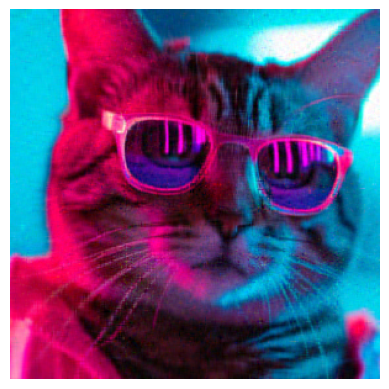

In [67]:
red_reconstructed = torch.mm(W_red, H_red)
green_reconstructed = torch.mm(W_green, H_green)
blue_reconstructed = torch.mm(W_blue, H_blue)
reconstructed_img = torch.stack([red_reconstructed, green_reconstructed, blue_reconstructed], dim=0)
reconstructed_img = torch.clamp(reconstructed_img, 0, 255)
reconstructed_img = reconstructed_img.to(torch.uint8)
reconstructed_img_np = reconstructed_img.permute(1, 2, 0).cpu().numpy()
plt.imshow(reconstructed_img_np)
plt.axis('off') 
plt.show()


**PART 2**